In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [53]:
#load data
 (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [54]:
#print shape of data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

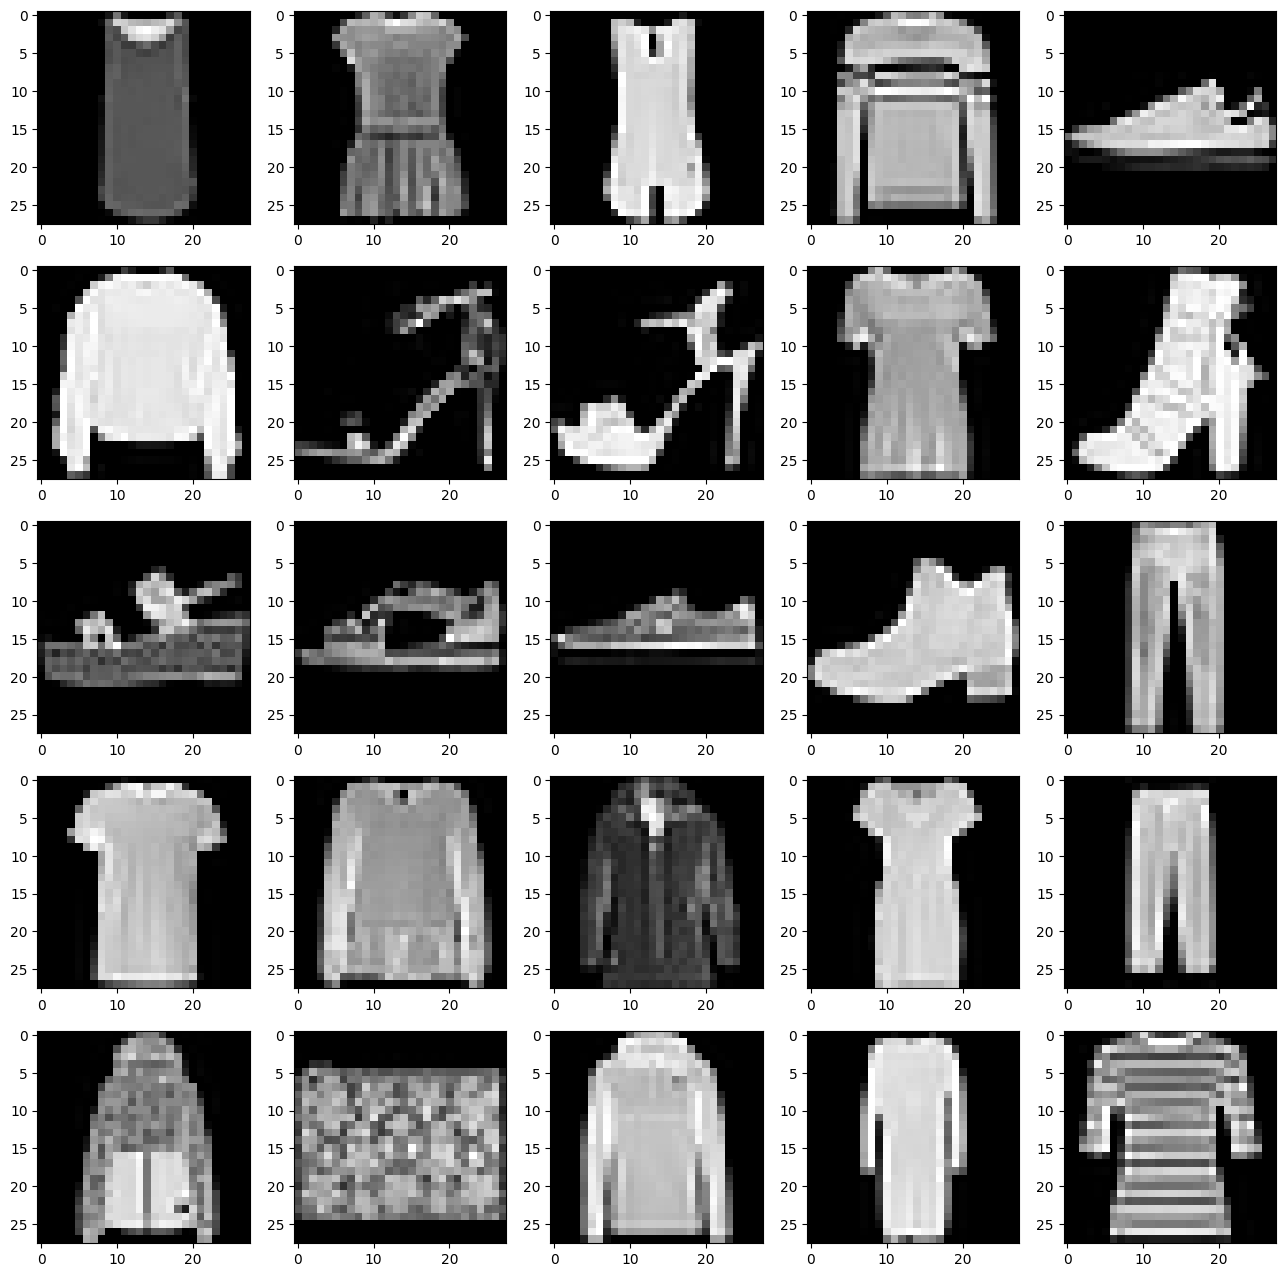

In [55]:
#show images
plt.figure(figsize = (16,16))

j = 1
for i in np.random.randint(0,20000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(x_train[j], cmap = 'grey')


In [17]:
y_train[0]

9

In [23]:
x_train.ndim

3

In [56]:
#expanding dimensions
x_train= np.expand_dims(x_train, -1)

In [57]:
x_test = np.expand_dims(x_test, -1)

In [58]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [59]:
#feature scaling
x_train = x_train/255
x_test = x_test/255

In [60]:
#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 2003)

In [61]:
x_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [62]:
x_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [68]:
#Building CNN model

img_model =  keras.models.Sequential([
    keras.layers.Convolution2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu', input_shape = [28,28,1]),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    keras.layers.Convolution2D(filters = 64, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units = 10, activation = 'softmax')

])

In [69]:
img_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,882 (624.54 KB)

 Trainable params: 159,882 (624.54 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#Compiling the model
img_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [71]:
#train CNN model
img_model.fit(x_train, y_train, epochs = 10, batch_size = 512,verbose = 1, validation_data = (x_val,y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 358ms/step - accuracy: 0.4673 - loss: 1.4681 - val_accuracy: 0.7768 - val_loss: 0.5840
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 362ms/step - accuracy: 0.7741 - loss: 0.6059 - val_accuracy: 0.8301 - val_loss: 0.4517
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 380ms/step - accuracy: 0.8255 - loss: 0.4737 - val_accuracy: 0.8535 - val_loss: 0.3879
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 356ms/step - accuracy: 0.8528 - loss: 0.4091 - val_accuracy: 0.8687 - val_loss: 0.3558
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.8639 - loss: 0.3730 - val_accuracy: 0.8798 - val_loss: 0.3240
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - accuracy: 0.8766 - loss: 0.3403 - val_accuracy: 0.8777 - val_loss: 0.3299
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 354ms/step - accuracy: 0.8846 - loss: 0.3171 - val_accuracy: 0.8852 - val_loss: 0.3071
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.8887 - loss: 0.3045 - val_accu

In [72]:
#testing the model
img_model.predict(np.expand_dims(x_test[0], 0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [73]:
np.argmax(img_model.predict(np.expand_dims(x_test[10], 0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


4

In [74]:
y_test[10]

4

In [75]:
#evaluating the model
img_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8990 - loss: 0.2879


[0.2916538119316101, 0.8942000269889832]

In [76]:
#saving the model
img_model.save('fashion_classification_cnn.h5')